<a href="https://colab.research.google.com/github/JamorMoussa/Deep-Learning/blob/main/DL-from-scratch/Sin_Approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
def f(x):
  return np.sin(x)

In [4]:
class SNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.L1 = nn.Linear(in_features = 1, out_features= 3, bias=True)
        self.L2 = nn.Linear(in_features = 3, out_features= 6, bias=True)
        self.L3 = nn.Linear(in_features = 6, out_features= 1, bias=True)
    def forward(self,x):
        self.z1 = self.L1(x)
        self.a1 = F.relu(self.z1)
        self.z2 = self.L2(self.a1)
        self.a2 = F.relu(self.z2)
        self.z3 = self.L3(self.a2)
        self.a3 = F.tanh(self.z3)
        return self.a3.squeeze()

In [5]:
X_train = torch.tensor((2*np.pi*np.random.rand(2000) - np.pi).reshape((-1,1))).float()

In [6]:
y_train = torch.tensor([np.sin(x) for x in X_train ])

In [17]:
model = SNN() 
L = nn.MSELoss()

In [13]:
opt = torch.optim.SGD(model.parameters(),lr=1e-1)

In [14]:
data1 = []

In [16]:
t = np.linspace(-np.pi, np.pi, 100)
i = 0
old_loss = L(model(X_train), y_train)
loss_value = old_loss
while abs(float(loss_value)) > 0.0008:
  opt.zero_grad()
  loss_value = L(model(X_train), y_train)
  loss_value.backward()
  opt.step()
  i+=1
  if i %1000 == 0 and float(old_loss) != float(loss_value):
    old_loss = loss_value
    print(i, ': ', loss_value)
    data1.append(model(torch.tensor(t).reshape(-1,1).float()))
print(loss_value)
del loss_value
del old_loss

1000 :  tensor(0.0298, grad_fn=<MseLossBackward0>)
2000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
3000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
4000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
5000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
6000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
7000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
8000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
9000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
10000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
11000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
12000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
13000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
14000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
15000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
16000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
17000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
18000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
19000 :  tensor(0.0297, grad_fn=<MseLossBackward0>)
20000 :  tensor(0.029

KeyboardInterrupt: ignored

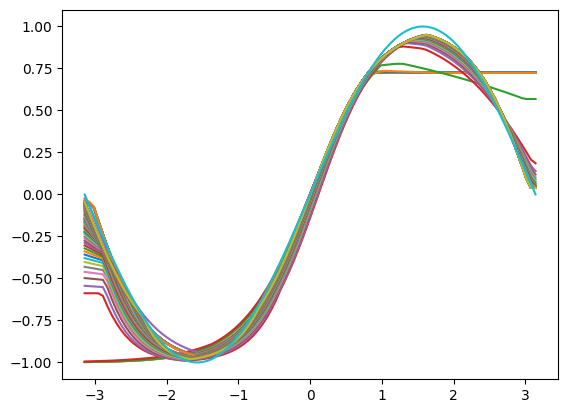

In [628]:
t = np.linspace(-np.pi, np.pi, 100)
for d in data1:
  y = d.detach().numpy()
  plt.plot(t,y)
plt.plot(t, f(t))

In [629]:
len(data)

139

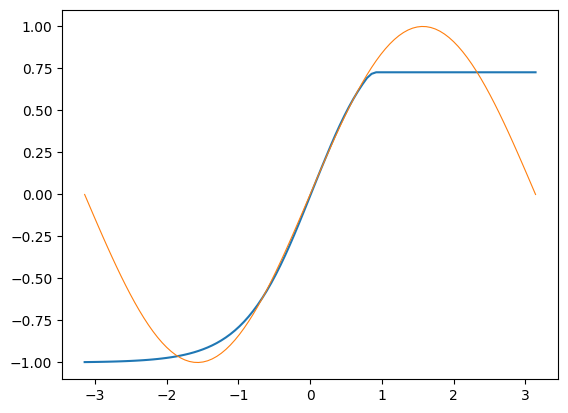

In [637]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()

line, = ax.plot(x, y)
line2, = ax.plot(x, y, linewidth=0.8)

def update(frame):
  if frame % 10 == 0 :
    y1 = data1[frame//10].detach().numpy()
    line.set_ydata(y1)
    line2.set_ydata(y)
  return line,

anim = FuncAnimation(fig, update ,frames=1390, interval=50)

writer = FFMpegWriter(fps=70)

anim.save('/content/animation.mp4', writer=writer)

In [636]:
1390/70

19.857142857142858